In [8]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

tensor([4., 5., 6., 8., 6., 2., 1., 7., 3.]) 9


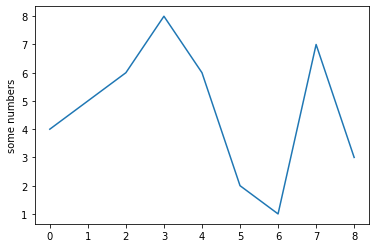

In [44]:
nums =  torch.randint(low=1, high=9, size=(9,)).float()
print(nums, len(nums))
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()

tensor([-1.6541, -1.9836, -2.6828, -1.3018,  0.5458,  0.1935, -3.2998, -0.5699,
        -0.5057]) 9
Parameter containing:
tensor([[[ 0.1123,  0.1524, -0.4820]]])


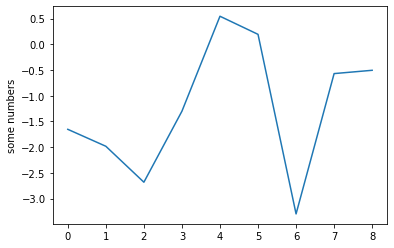

In [49]:
conv = nn.Conv1d(1, 1, 3, padding=1, padding_mode='replicate')
conv.requires_grad_(False)
#conv.weight.data = conv.weight - conv.weight.mean()
res = conv(nums[None][None])[0][0]
print(res, len(res))
print(conv.weight)
plt.plot(res)
plt.ylabel('some numbers')
plt.show()

In [50]:
nums.mean(), res.mean(), nums.mean() - res.mean()

(tensor(4.6667), tensor(-1.2509), tensor(5.9176))

tensor([4.2635, 3.9340, 3.2348, 4.6158, 6.4634, 6.1111, 2.6178, 5.3477, 5.4119]) tensor(4.6667)


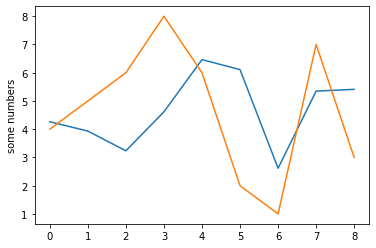

In [51]:
r = res + (nums.mean() - res.mean())

print(r, r.mean())
plt.plot(r)
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()

In [39]:
len(nums), len(r)

(9, 7)

In [65]:
def mean_1d_1ch(n):
    weight = n ** -1    
    hood =  (torch.zeros(n) + weight).tolist()    
    zeros = torch.zeros(n).tolist()
    weights = torch.tensor([[hood]])
    padding = int((n-1) / 2.)
    res = nn.Conv1d(1, 1, n, stride=1, padding=padding,
            bias=False, padding_mode='replicate')
    res.requires_grad_(False)
    res.weight.data = weights
    return res

print(nn.Conv1d(1, 1, 3).weight.shape)
print(mean_1d_3channels(3).weight.shape)
mean_1d_3channels(5).weight

torch.Size([1, 1, 3])
torch.Size([1, 1, 3])


Parameter containing:
tensor([[[0.2000, 0.2000, 0.2000, 0.2000, 0.2000]]])

In [68]:
n = 3
conv = mean_1d_1ch(n)
conv(nums[None][None])

tensor([[[4.3333, 5.0000, 6.3333, 6.6667, 5.3333, 3.0000, 3.3333, 3.6667,
          4.3333]]])

tensor([[[3.9302, 4.2673, 4.9014, 6.6158, 7.1301, 4.4445, 1.2845, 4.3477,
          5.0786]]]) tensor(4.6667)


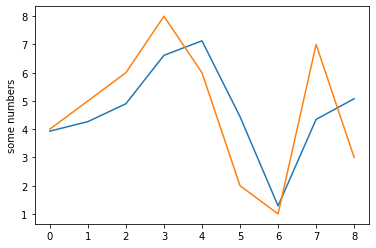

In [71]:
r = res + (conv(nums[None][None]) - conv(res[None][None]).mean())

print(r, r.mean())
plt.plot(r[0][0])
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()

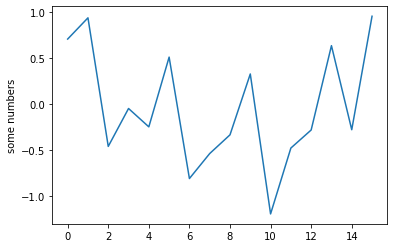

In [84]:
nums =  torch.randn(16)
#print(nums, len(nums))
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()

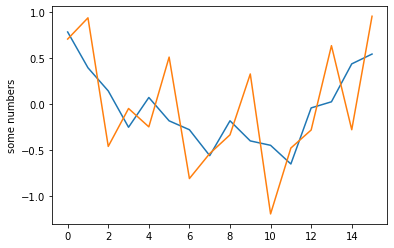

In [85]:
res = conv(nums[None][None])[0][0]
#print(res, len(res))
#print(conv.weight)
plt.plot(res)
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()

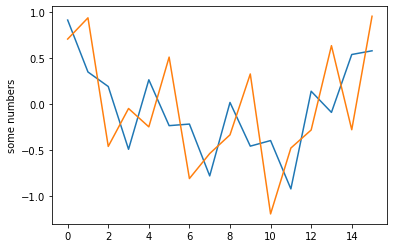

In [87]:
r = res + (conv(nums[None][None]) - conv(res[None][None]))#.mean())

#print(r, r.mean())
plt.plot(r[0][0])
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()

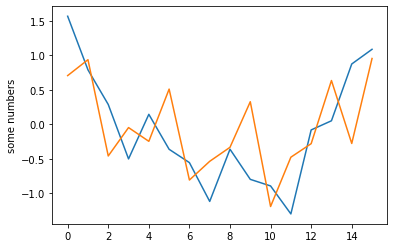

In [88]:
r = res + conv(nums[None][None])

#print(r, r.mean())
plt.plot(r[0][0])
plt.plot(nums)
plt.ylabel('some numbers')
plt.show()